In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('/home/sergei/Документы/GitHub/ml_python_blastim/data.xlsx')
df

,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant
0,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,Other,0,0,NaN
1,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,XBB.1.5-like,0,0,NaN
2,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,XBB.1.5-like+F456L,0,0,NaN
3,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.351,0,0,NaN
4,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.617.2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148253,Sweden,SE,2023-45,TESSy,3523.0,366,10.4,True,XBB.1.5-like+F456L,321,366,87.7
148254,Sweden,SE,2023-46,TESSy,3344.0,200,6.0,True,BA.2,5,200,2.5
148255,Sweden,SE,2023-46,TESSy,3344.0,200,6.0,True,Other,1,200,0.5
148256,Sweden,SE,2023-46,TESSy,3344.0,200,6.0,True,XBB.1.5-like,27,200,13.5


Text(0.5, 0, 'length')

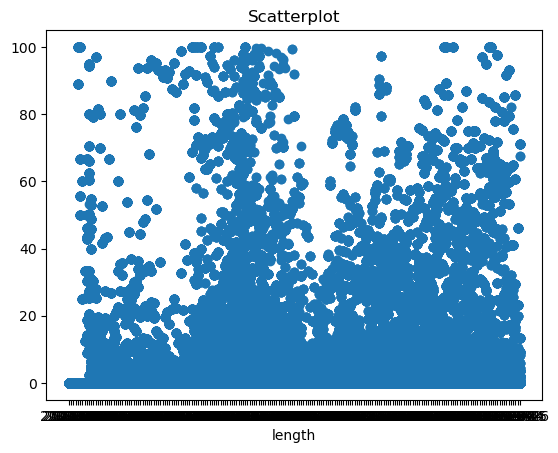

In [5]:
plt.scatter(
    x=df['year_week'],
    y=df['percent_cases_sequenced'],
)

plt.title('Scatterplot')
plt.xlabel('width')
plt.xlabel('length')

In [6]:
df.describe()

,new_cases,number_sequenced,percent_cases_sequenced,number_detections_variant,number_sequenced_known_variant,percent_variant
count,1.416440e+05,148258.000000,144227.000000,148258.000000,148258.000000,126204.000000
mean,3.495699e+04,844.232682,10.755476,71.503440,844.232682,7.036748
std,1.254671e+05,2324.176275,18.328649,700.313257,2324.176275,21.733688
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.250000e+02,12.000000,0.500000,0.000000,12.000000,0.000000
50%,3.662000e+03,146.000000,2.900000,0.000000,146.000000,0.000000
75%,1.811700e+04,682.000000,11.100000,0.000000,682.000000,0.100000
max,2.486551e+06,60124.000000,100.000000,50774.000000,60124.000000,100.000000


Austria
Belgium
Bulgaria
Croatia
Cyprus
Czechia
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
Iceland
Ireland
Italy
Latvia
Liechtenstein
Lithuania
Luxembourg
Malta
Netherlands
Norway
Poland
Portugal
Romania
Slovakia
Slovenia
Spain
Sweden


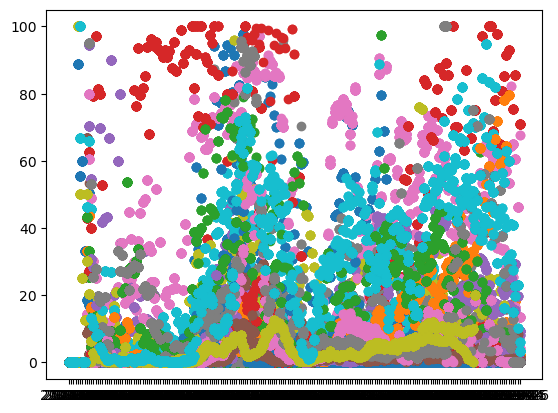

In [7]:
for sp in df.country.unique():
    print(sp)
    s1 = df.query('country == @sp')
    plt.scatter(
        x=s1['year_week'],
        y=s1['percent_cases_sequenced'],
        label=sp
    )

In [20]:
df.isnull().sum() #обнаружение недостающих значений

country                               0
country_code                          0
year_week                             0
source                                0
new_cases                          6614
number_sequenced                      0
percent_cases_sequenced            4031
valid_denominator                     0
variant                               0
number_detections_variant             0
number_sequenced_known_variant        0
percent_variant                   22054
dtype: int64

In [8]:
medians = (
    df
    .groupby('country', as_index=False)
    ['percent_cases_sequenced']
    .median()
    .rename(columns={'percent_cases_sequenced': 'median percent_cases_sequenced'})
)
medians

,country,median percent_cases_sequenced
0,Austria,7.7
1,Belgium,5.6
2,Bulgaria,1.5
3,Croatia,3.3
4,Cyprus,1.0
5,Czechia,1.5
6,Denmark,50.5
7,Estonia,0.6
8,Finland,8.5
9,France,1.6


In [9]:
df2 = (
    df
    .merge(
        medians,
        on='country'
    )
)

In [10]:
df2.fillna({'percent_cases_sequenced': df2['median percent_cases_sequenced']})

,country,country_code,year_week,source,new_cases,number_sequenced,percent_cases_sequenced,valid_denominator,variant,number_detections_variant,number_sequenced_known_variant,percent_variant,median percent_cases_sequenced
0,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,Other,0,0,NaN,7.7
1,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,XBB.1.5-like,0,0,NaN,7.7
2,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,XBB.1.5-like+F456L,0,0,NaN,7.7
3,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.351,0,0,NaN,7.7
4,Austria,AT,2020-01,GISAID,NaN,0,0.0,True,B.1.617.2,0,0,NaN,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148253,Sweden,SE,2023-45,TESSy,3523.0,366,10.4,True,XBB.1.5-like+F456L,321,366,87.7,27.9
148254,Sweden,SE,2023-46,TESSy,3344.0,200,6.0,True,BA.2,5,200,2.5,27.9
148255,Sweden,SE,2023-46,TESSy,3344.0,200,6.0,True,Other,1,200,0.5,27.9
148256,Sweden,SE,2023-46,TESSy,3344.0,200,6.0,True,XBB.1.5-like,27,200,13.5,27.9


In [11]:
 df2.head

<bound method NDFrame.head of         country country_code year_week  source  new_cases  number_sequenced  \
0       Austria           AT   2020-01  GISAID        NaN                 0   
1       Austria           AT   2020-01  GISAID        NaN                 0   
2       Austria           AT   2020-01  GISAID        NaN                 0   
3       Austria           AT   2020-01  GISAID        NaN                 0   
4       Austria           AT   2020-01  GISAID        NaN                 0   
...         ...          ...       ...     ...        ...               ...   
148253   Sweden           SE   2023-45   TESSy     3523.0               366   
148254   Sweden           SE   2023-46   TESSy     3344.0               200   
148255   Sweden           SE   2023-46   TESSy     3344.0               200   
148256   Sweden           SE   2023-46   TESSy     3344.0               200   
148257   Sweden           SE   2023-46   TESSy     3344.0               200   

        percent_cases

In [14]:
df3 = df2[['country', 'percent_cases_sequenced']]
df3

,country,percent_cases_sequenced
0,Austria,0.0
1,Austria,0.0
2,Austria,0.0
3,Austria,0.0
4,Austria,0.0
...,...,...
148253,Sweden,10.4
148254,Sweden,6.0
148255,Sweden,6.0
148256,Sweden,6.0


/home/sergei/miniconda3/envs/blast_env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


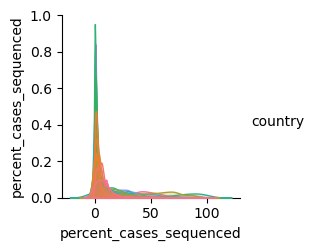

In [16]:
import seaborn as sns

sns.pairplot(
    data=df3,
    hue='country'
)

<Axes: xlabel='country', ylabel='percent_cases_sequenced'>

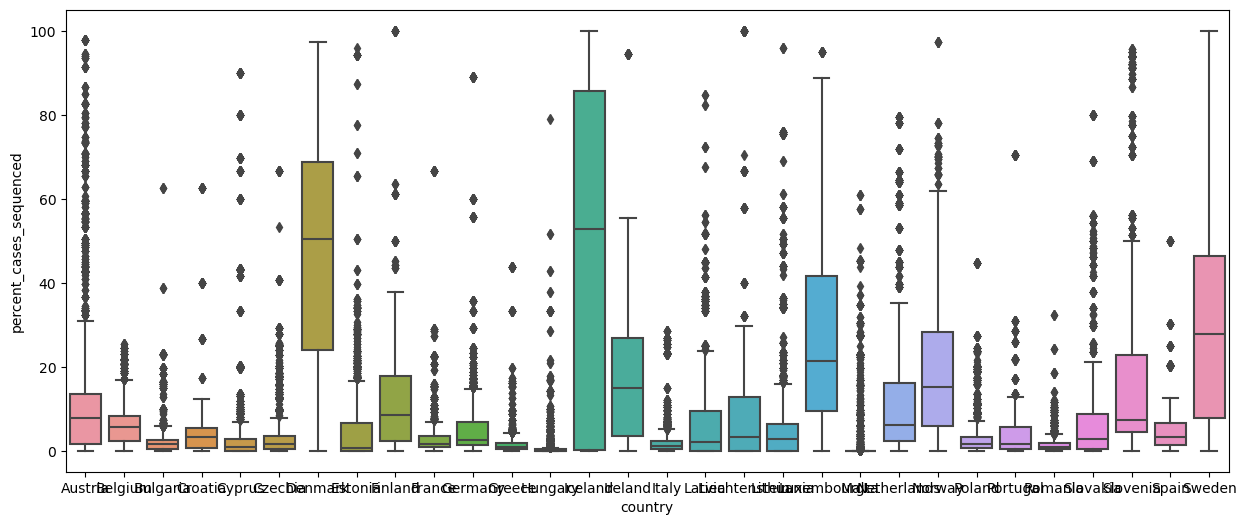

In [18]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.boxplot(
    data=df, 
    y='percent_cases_sequenced', 
    x='country'
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Austria'),
  Text(1, 0, 'Belgium'),
  Text(2, 0, 'Bulgaria'),
  Text(3, 0, 'Croatia'),
  Text(4, 0, 'Cyprus'),
  Text(5, 0, 'Czechia'),
  Text(6, 0, 'Denmark'),
  Text(7, 0, 'Estonia'),
  Text(8, 0, 'Finland'),
  Text(9, 0, 'France'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Greece'),
  Text(12, 0, 'Hungary'),
  Text(13, 0, 'Iceland'),
  Text(14, 0, 'Ireland'),
  Text(15, 0, 'Italy'),
  Text(16, 0, 'Latvia'),
  Text(17, 0, 'Liechtenstein'),
  Text(18, 0, 'Lithuania'),
  Text(19, 0, 'Luxembourg'),
  Text(20, 0, 'Malta'),
  Text(21, 0, 'Netherlands'),
  Text(22, 0, 'Norway'),
  Text(23, 0, 'Poland'),
  Text(24, 0, 'Portugal'),
  Text(25, 0, 'Romania'),
  Text(26, 0, 'Slovakia'),
  Text(27, 0, 'Slovenia'),
  Text(28, 0, 'Spain'),
  Text(29, 0, 'Sweden')])

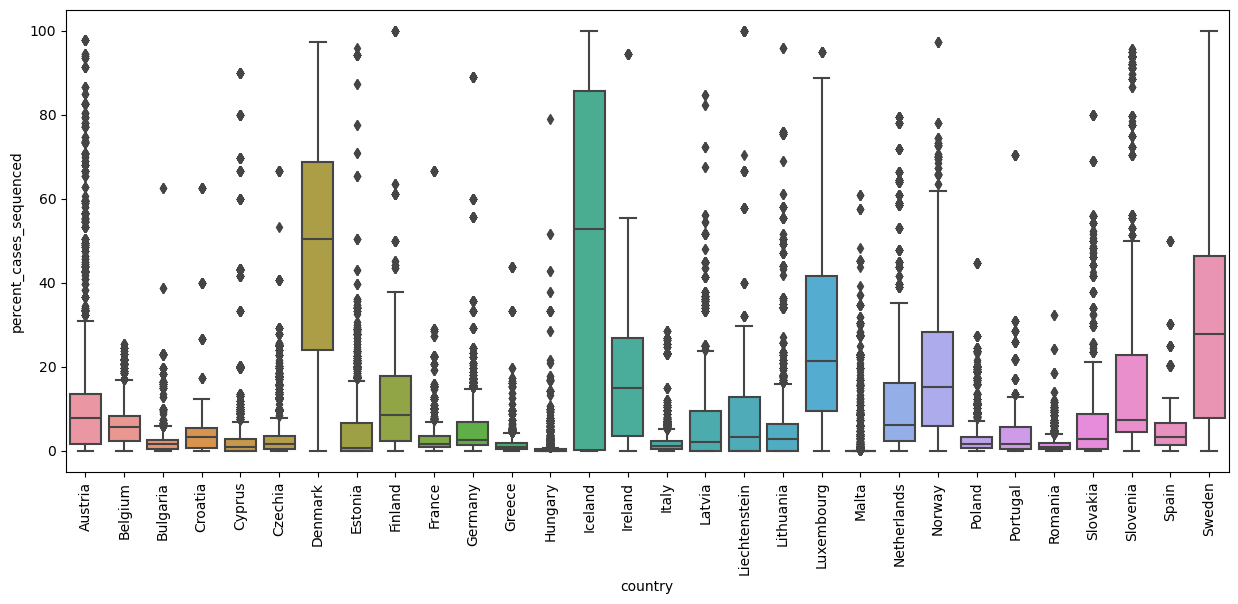

In [29]:
sns.boxplot(
    data=df3, 
    y='percent_cases_sequenced', 
    x='country')
plt.ylabel('percent_cases_sequenced')
plt.xlabel('country')
plt.xticks(rotation=90)